# Illustration of Tilt-angle for a single prism

### Import the required stuff

In [1]:
# force division to return a float ("true division"), even with integers arguments
# https://www.python.org/dev/peps/pep-0238/
from __future__ import division

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism, transform
from fatiando.vis import mpl

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [4]:
import fatiando

In [5]:
# show the Fatiando version
fatiando.__version__

'0.5-53-gac2afbc'

### Define the model

In [6]:
# Direction of the main field at the study area
inc, dec = -60, 0

# total magnetization of the source
intensity, inclination, declination = 10, -17, 32

# density (contrast) of the source
density = 1000

# Create a prism
model = [mesher.Prism(-1000, 1000, -1500, 500, 0, 1000,
                      {'magnetization': utils.ang2vec(intensity, 
                                                      inclination, 
                                                      declination),
                       'density': density})]

# Create a model with purely-induced magnetization at the pole
model_pole = [model[0].copy()]
model_pole[0].addprop('magnetization', utils.ang2vec(intensity, 90, 0))

In [7]:
# print the physical properties of the models
print model[0].props
print model_pole[0].props

{'magnetization': array([ 8.10992428,  5.06764313, -2.92371705]), 'density': 1000}
{'magnetization': array([6.123234e-16, 0.000000e+00, 1.000000e+01]), 'density': 1000}


In [8]:
# Bounds of the prism
bounds = model[0].get_bounds()

In [9]:
bounds

[-1000.0, 1000.0, -1500.0, 500.0, 0.0, 1000.0]

### Define the computation points

In [10]:
area = (-5000, 5000, -5000, 5000)
shape = (100, 100)
z0 = -500
x, y, z = gridder.regular(area, shape, z=z0)

### Compute the anomalous quantities

In [11]:
# Total-field anomaly
tf = prism.tf(x, y, z, model, inc, dec)
tf_RTP = prism.tf(x, y, z, model_pole, 90, 0)

# Gravity disturbance (approximately the gravity anomaly)
gz = prism.gz(x, y, z, model)

# Bz component
bz = prism.bz(x, y, z, model)

# zz gravity gradient component 
gzz = prism.gzz(x, y, z, model)

# Total gradient of the total-field anomaly
tga = transform.tga(x, y, tf, shape)

/home/vanderlei/anaconda3/envs/fatiando2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


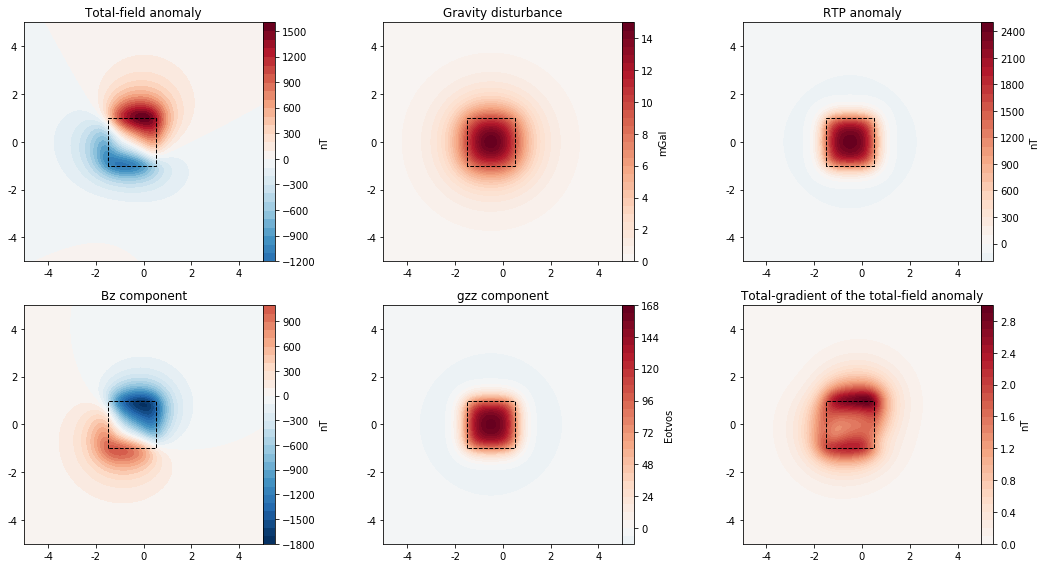

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[0][0].set_aspect('equal')
plt.sca(axes[0][0])
plt.title("Total-field anomaly")
ranges = np.max(np.abs(tf))
mpl.contourf(y, x, tf, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('nT')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[0][1].set_aspect('equal')
plt.sca(axes[0][1])
plt.title("Gravity disturbance")
ranges = np.max(np.abs(gz))
mpl.contourf(y, x, gz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('mGal')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[0][2].set_aspect('equal')
plt.sca(axes[0][2])
plt.title("RTP anomaly")
ranges = np.max(np.abs(tf_RTP))
mpl.contourf(y, x, tf_RTP, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('nT')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][0].set_aspect('equal')
plt.sca(axes[1][0])
plt.title("Bz component")
ranges = np.max(np.abs(bz))
mpl.contourf(y, x, bz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('nT')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][1].set_aspect('equal')
plt.sca(axes[1][1])
plt.title("gzz component")
ranges = np.max(np.abs(gzz))
mpl.contourf(y, x, gzz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Eotvos')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][2].set_aspect('equal')
plt.sca(axes[1][2])
plt.title("Total-gradient of the total-field anomaly")
ranges = np.max(np.abs(tga))
mpl.contourf(y, x, tga, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('nT')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
plt.tight_layout()
plt.show()

### Compute the Tilt-angle

In [13]:
# Tilt-angle of the total-field anomaly
TA_tf = transform.tilt(x, y, tf, shape)
TA_tf_RTP = transform.tilt(x, y, tf_RTP, shape)

# Tilt-angle of the gravity disturbance
TA_gz = transform.tilt(x, y, gz, shape)

# Tilt-angle of the Bz component
TA_bz = transform.tilt(x, y, bz, shape)

# Tilt-angle of the gzz component
TA_gzz = transform.tilt(x, y, gzz, shape)

# Tilt-angle of the total gradient
TA_tga = transform.tilt(x, y, tga, shape)

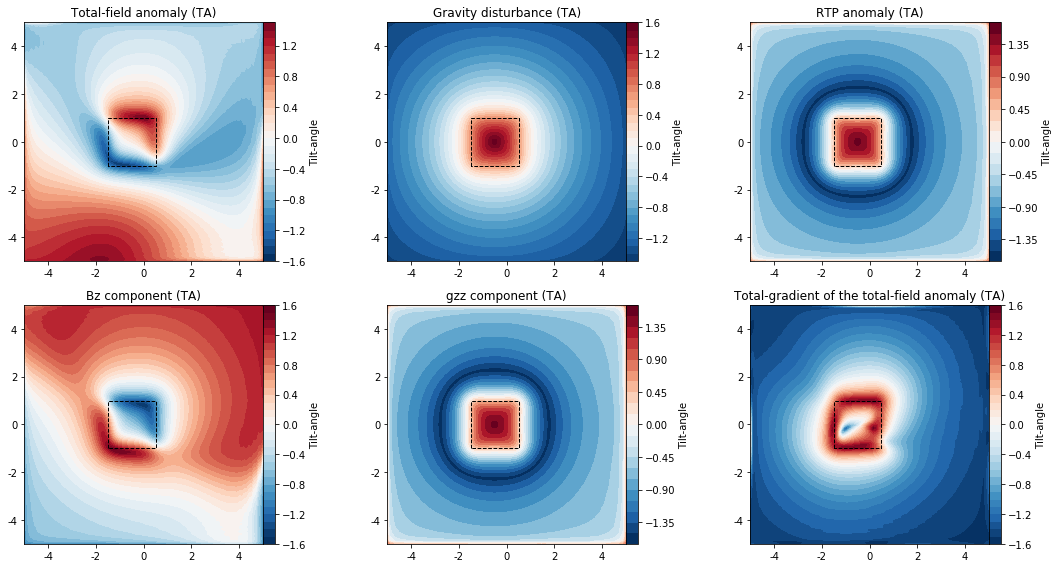

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[0][0].set_aspect('equal')
plt.sca(axes[0][0])
plt.title("Total-field anomaly (TA)")
ranges = np.max(np.abs(TA_tf))
mpl.contourf(y, x, TA_tf, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[0][1].set_aspect('equal')
plt.sca(axes[0][1])
plt.title("Gravity disturbance (TA)")
ranges = np.max(np.abs(TA_gz))
mpl.contourf(y, x, TA_gz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[0][2].set_aspect('equal')
plt.sca(axes[0][2])
plt.title("RTP anomaly (TA)")
ranges = np.max(np.abs(TA_tf_RTP))
mpl.contourf(y, x, TA_tf_RTP, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][0].set_aspect('equal')
plt.sca(axes[1][0])
plt.title("Bz component (TA)")
ranges = np.max(np.abs(TA_bz))
mpl.contourf(y, x, TA_bz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][1].set_aspect('equal')
plt.sca(axes[1][1])
plt.title("gzz component (TA)")
ranges = np.max(np.abs(TA_gzz))
mpl.contourf(y, x, TA_gzz, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
axes[1][2].set_aspect('equal')
plt.sca(axes[1][2])
plt.title("Total-gradient of the total-field anomaly (TA)")
ranges = np.max(np.abs(TA_tga))
mpl.contourf(y, x, TA_tga, shape, 30, cmap=plt.cm.RdBu_r, vmin = -ranges, vmax = ranges)
plt.colorbar(pad=0).set_label('Tilt-angle')
mpl.square(bounds[:4], style='k--', xy2ne=True)
mpl.m2km()
plt.tight_layout()
plt.show()